In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ggplot
%matplotlib inline

In [2]:
properties = pd.read_csv('./data/properties_2016.csv')
transactions = pd.read_csv('./data/train_2016_v2.csv')

/home/matthew/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = transactions.merge(properties, on='parcelid', how='left')
train['abs_logerror'] = train['logerror'].abs()

### Add Identifier
We'll add a feature to ensure we can tell the difference between features that are in the test set and in the train set

,latitude,longitude,logerror
0,33339295.0,-118331034.0,0.050700
1,33340134.0,-118325615.0,-0.047100
2,33340239.0,-118324732.0,-0.018200
3,33340508.0,-118324950.0,0.042100
4,33340566.0,-118323884.0,0.049700
5,33340937.0,-118326111.0,0.107100
6,33341018.0,-118327253.0,0.077000
7,33341535.0,-118327699.0,-0.126700
8,33341653.0,-118324469.0,-0.039800
9,33341879.0,-118321856.0,-0.048100


In [10]:
properties['in_train'] = properties['parcelid'].isin(transactions['parcelid'])

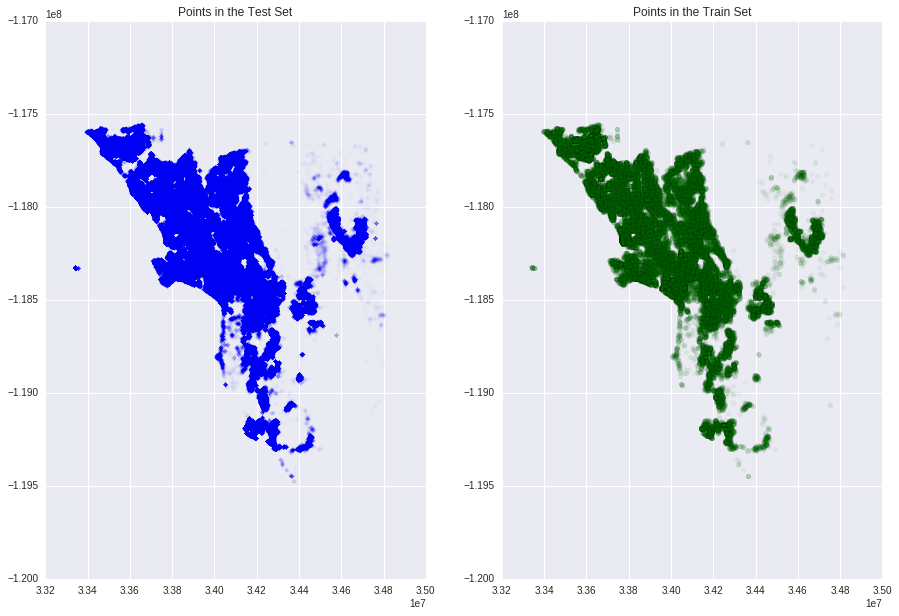

In [28]:
train_ix = properties[properties['in_train'] == True].index
test_ix = properties[properties['in_train'] == False].index
plt.figure(figsize=(15,10))
ax = plt.subplot(121)
ax2 = plt.subplot(122)

ax.set_title('Points in the Test Set')
ax2.set_title('Points in the Train Set')
ax.scatter(properties['latitude'].iloc[test_ix], properties['longitude'].iloc[test_ix], c='b', alpha=0.005)
ax2.scatter(properties['latitude'].iloc[train_ix], properties['longitude'].iloc[train_ix], c='g', alpha=0.05)


### Outlier Plots
Just outliers

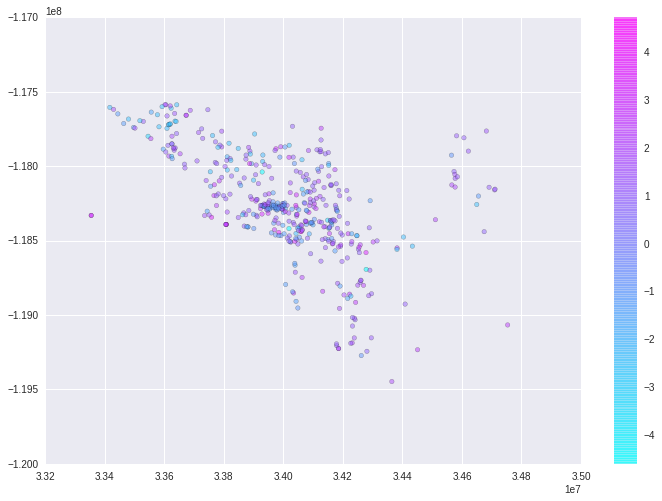

In [67]:
import matplotlib.cm as cm
outliers = train[train['abs_logerror'] > np.percentile(train['abs_logerror'], 99.5)].index
plt.figure(figsize=(12,8))
plt.scatter(train['latitude'].iloc[outliers], train['longitude'].iloc[outliers], c=train['logerror'].iloc[outliers], cmap='cool', alpha=.5)
plt.colorbar()

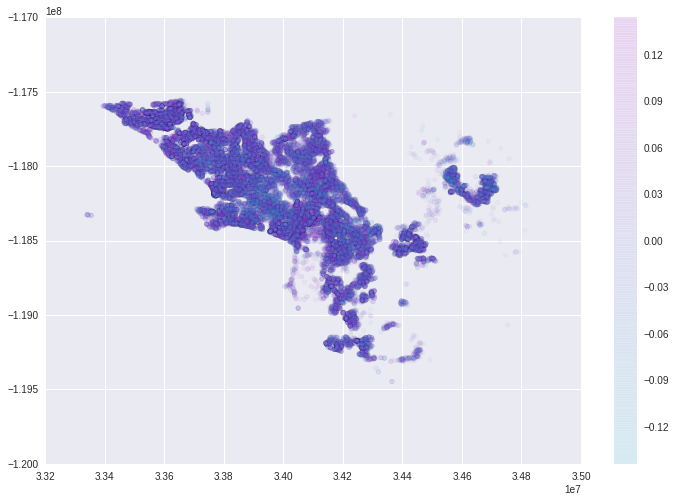

In [74]:
import matplotlib.cm as cm
outliers = train[train['abs_logerror'] < np.percentile(train['abs_logerror'], 90)].index
plt.figure(figsize=(12,8))
plt.scatter(train['latitude'].iloc[outliers], train['longitude'].iloc[outliers], c=train['logerror'].iloc[outliers], cmap='cool', alpha=.05)
plt.colorbar()

In [77]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(train[['latitude','longitude','logerror']].iloc[outliers])

dbs = DBSCAN()
dbs.fit(normalized_data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [82]:
from sklearn import metrics

core_samples_mask = np.zeros_like(dbs.labels_, dtype=bool)
core_samples_mask[dbs.core_sample_indices_] = True
labels = dbs.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

dbs.components_

array([[ 1.0415829 , -0.81027439,  0.46291241],
       [ 0.49876155,  0.05297264, -0.17193027],
       [-0.92889182, -0.31591413,  0.34639066],
       ..., 
       [ 0.74897008, -1.01256074, -0.80677296],
       [ 0.73300188, -0.08420065,  0.04905927],
       [-0.14811574, -0.47561967,  1.11784506]])

### Hex Map

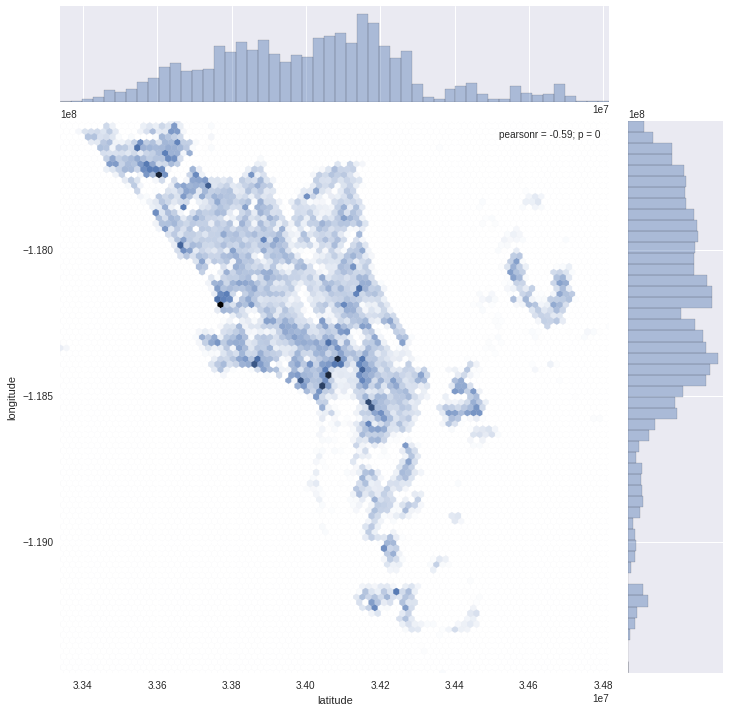

In [65]:
sns.jointplot(train['latitude'], train['longitude'], kind='hex', size=10)

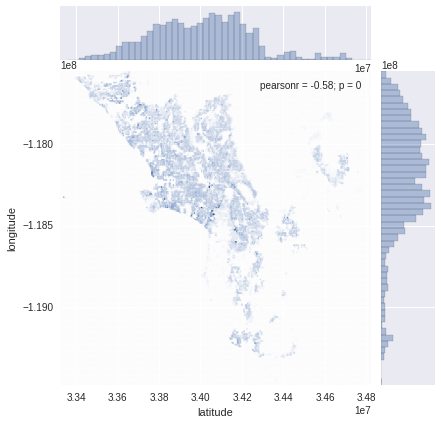

In [71]:
%matplotlib inline
sns.jointplot(properties['latitude'], properties['longitude'], kind='hex', size=6)

In [5]:
grid = train[['latitude','longitude','logerror']].iloc[outliers]

grid_pixels = grid.groupby(['latitude','longitude']).mean().reset_index()

NameError: name 'outliers' is not defined

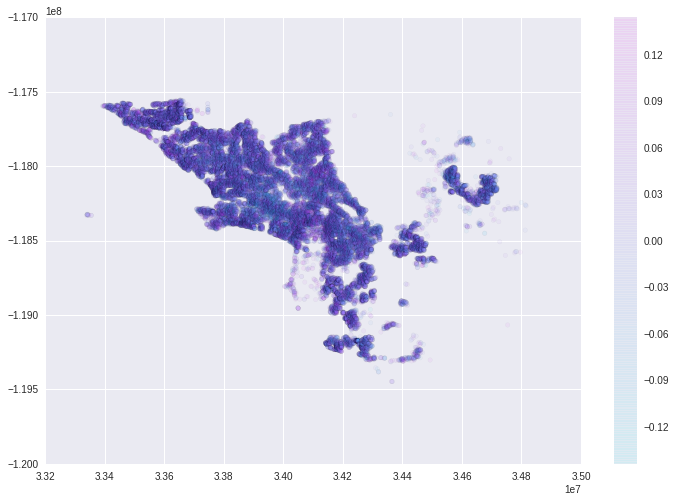

In [102]:
plt.figure(figsize=(12,8))
plt.scatter(grid_pixels['latitude'], grid_pixels['longitude'], c=grid_pixels['logerror'], cmap='cool', alpha=.05)
plt.colorbar()

In [105]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import cross_val_score

In [4]:
knn = KNN(n_neighbors=75, weights='distance')

cross_val_score(knn, grid_pixels[['latitude','longitude']], grid_pixels['logerror'],scoring='neg_mean_absolute_error')

NameError: name 'KNN' is not defined

In [123]:
from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(knn, {'n_neighbors':list(range(50,90))}, scoring='neg_mean_absolute_error', cv=10)

In [124]:
gsearch.fit(grid_pixels[['latitude','longitude']], grid_pixels['logerror'])

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=75, p=2,
          weights='distance'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [126]:
gsearch.best_score_

-0.037506719017898572

In [125]:
knn_opt = gsearch.best_estimator_
knn_opt.fit(grid_pixels[['latitude','longitude']], grid_pixels['logerror'])

In [140]:
properties['latitude'].fillna(0, inplace=True)
properties['longitude'].fillna(0, inplace=True)

In [141]:
predictions = knn_opt.predict(properties[['latitude','longitude']])

In [142]:
output = pd.DataFrame({'ParcelId': properties['parcelid'],
                           '201610': predictions, '201611': predictions, '201612': predictions,
                           '201710': predictions, '201711': predictions, '201712': predictions})

In [144]:
output.to_csv('Geographic Mean.csv', index=False)

## Averaging with Other Predictions

In [5]:
#predictions1 = pd.read_csv('Geographic Mean.csv')
#predictions2 = pd.read_csv('sub20170717_043329.csv')

preds = (predictions1.drop('ParcelId', axis=1) + predictions2.drop('ParcelId', axis=1))/2

preds['ParcelId'] = predictions2.ParcelId

In [8]:
cols = preds.columns.tolist()
cols = cols[-1:] + cols[:-1]
preds = preds[cols]

In [11]:
preds.to_csv('Geographic Mean Split.csv', index=False)